## Task 1 - Rectification of Satellite Imagery

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Original Image')

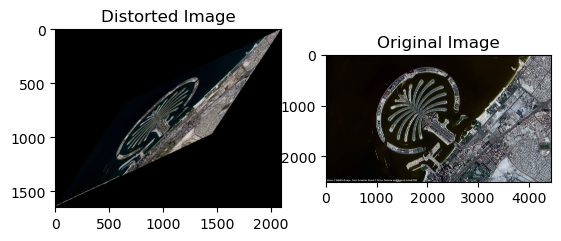

In [10]:
distorted_image = cv2.imread('distorted_satellite.png')
distorted_image_rgb = cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
original_image = cv2.imread('palm_jumeira.jpg')

fig, ax = plt.subplots(1, 2)

ax[0].imshow(distorted_image_rgb)
ax[0].set_title('Distorted Image')

ax[1].imshow(original_image)
ax[1].set_title('Original Image')

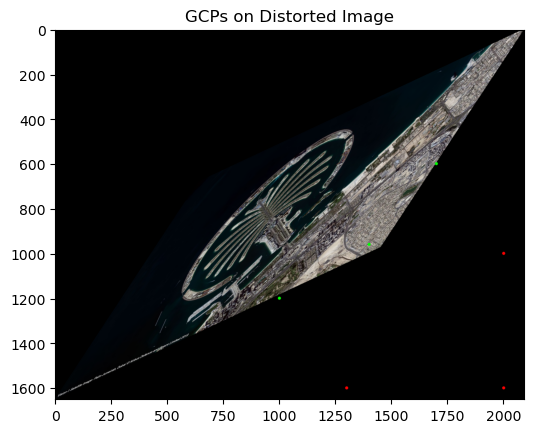

In [49]:
gcp_rectified = np.array([[1000, 1200], [1400, 960], [1700, 600]], dtype=np.float32)
gcp_distorted = np.array([[1300, 1600], [2000, 1600], [2000, 1000]], dtype=np.float32)

distorted_image_rgb = cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB)

for point in gcp_distorted:
    cv2.circle(distorted_image_rgb, tuple(point.astype(int)), 7, (255, 0, 0), -1)

for point in gcp_rectified:
    cv2.circle(distorted_image_rgb, tuple(point.astype(int)), 7, (0, 255, 0), -1)

plt.imshow(distorted_image_rgb)
plt.title('GCPs on Distorted Image')
plt.show()

In [51]:
def apply_affine_transformation(affine_matrix, x, y):
    """Applies the affine transformation matrix to the coordinates (x, y)."""
    # Construct the point in homogeneous coordinates
    point = np.array([x, y, 1])  # Homogeneous coordinates (x, y, 1)
    
    # Apply the affine transformation (which is a 2x3 matrix)
    transformed_point = np.dot(affine_matrix, point)
    
    return transformed_point[0], transformed_point[1]

In [52]:
def bilinear_interpolation(image, x, y):
    """Performs bilinear interpolation for a given (x, y) point."""
    x1, y1 = int(np.floor(x)), int(np.floor(y))
    x2, y2 = int(np.ceil(x)), int(np.ceil(y))
    
    # Ensure the coordinates are within the image bounds
    if x1 < 0 or x2 >= image.shape[1] or y1 < 0 or y2 >= image.shape[0]:
        return [0, 0, 0]  # Return black for out-of-bound pixels

    # Fractional part of the coordinates
    x_frac = x - x1
    y_frac = y - y1
    
    # Get pixel values at the four surrounding points
    top_left = image[y1, x1]
    top_right = image[y1, x2]
    bottom_left = image[y2, x1]
    bottom_right = image[y2, x2]
    
    # Interpolate pixel values
    top = (1 - x_frac) * top_left + x_frac * top_right
    bottom = (1 - x_frac) * bottom_left + x_frac * bottom_right
    interpolated_value = (1 - y_frac) * top + y_frac * bottom
    
    return interpolated_value.astype(np.uint8)

In [53]:
def transform_image(distorted_img, affine_matrix, output_size):
    # Create an empty array for the rectified image
    rectified_img = np.zeros((output_size[1], output_size[0], 3), dtype=np.uint8)
    
    for y in range(output_size[1]):
        for x in range(output_size[0]):
            # Apply the affine transformation to get the corresponding point in the distorted image
            src_x, src_y = apply_affine_transformation(affine_matrix, x, y)
            
            # Use bilinear interpolation to resample the pixel (assuming bilinear_interpolation is defined)
            rectified_img[y, x] = bilinear_interpolation(distorted_img, src_x, src_y)
    
    return rectified_img

Text(0.5, 1.0, 'Original image')

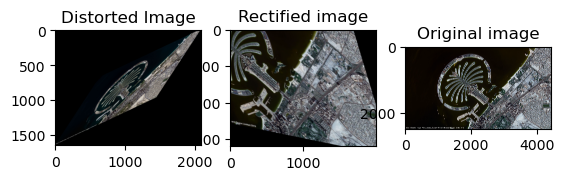

In [76]:
output_size = (2000, 1600)
affine_matrix = cv2.getAffineTransform(gcp_distorted, gcp_rectified)

rectified_image = transform_image(distorted_image, affine_matrix, output_size)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(distorted_image_rgb)
ax[0].set_title('Distorted Image')

ax[1].imshow(rectified_image)
ax[1].set_title('Rectified image')

ax[2].imshow(original_image)
ax[2].set_title('Original image')

Text(0.5, 1.0, 'Original Image')

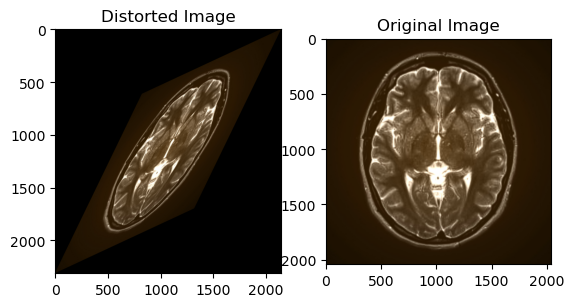

In [117]:
distorted_mri = cv2.imread('distorted_mri.png')
original_mri = cv2.imread('mri.jpg')

fig, ax = plt.subplots(1, 2)

ax[0].imshow(distorted_mri)
ax[0].set_title('Distorted Image')

ax[1].imshow(original_mri)
ax[1].set_title('Original Image')

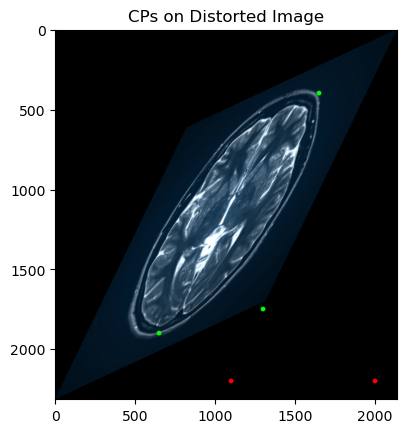

In [182]:
distorted_mri = cv2.imread('distorted_mri.png')
cp_rectified = np.array([[1300, 1750], [650, 1900], [1650, 400]], dtype=np.float32) # green
cp_distorted = np.array([[2000, 2200], [1100, 2200], [1650, 400]], dtype=np.float32) # red

distorted_mri = cv2.cvtColor(distorted_mri, cv2.COLOR_BGR2RGB)

for point in cp_distorted:
    cv2.circle(distorted_mri, tuple(point.astype(int)), 15, (255, 0, 0), -1)

for point in cp_rectified:
    cv2.circle(distorted_mri, tuple(point.astype(int)), 15, (0, 255, 0), -1)

plt.imshow(distorted_mri)
plt.title('CPs on Distorted Image')
plt.show()

Text(0.5, 1.0, 'Original image')

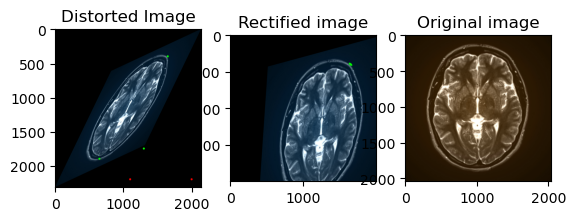

In [133]:
output_size = (2000, 2000)
affine_matrix = cv2.getAffineTransform(cp_distorted, cp_rectified)

rectified_mri = transform_image(distorted_mri, affine_matrix, output_size)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(distorted_mri)
ax[0].set_title('Distorted Image')

ax[1].imshow(rectified_mri)
ax[1].set_title('Rectified image')

ax[2].imshow(original_mri)
ax[2].set_title('Original image')

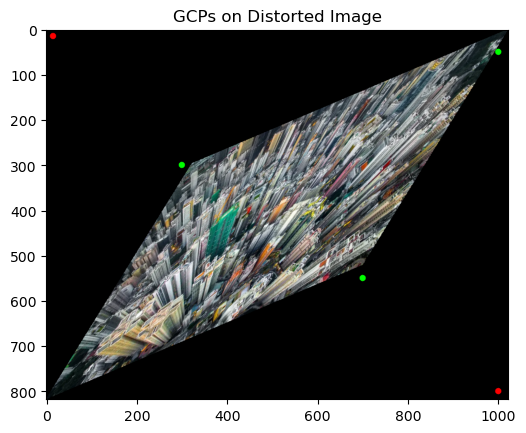

In [152]:
distorted_drone = cv2.imread('drone_distorted.png')
cp_rectified = np.array([[300, 300], [700, 550], [1000, 50]], dtype=np.float32) # green
cp_distorted = np.array([[15, 15], [1000, 800], [1000, 50]], dtype=np.float32) # red

distorted_drone = cv2.cvtColor(distorted_drone, cv2.COLOR_BGR2RGB)

for point in cp_distorted:
    cv2.circle(distorted_drone, tuple(point.astype(int)), 7, (255, 0, 0), -1)

for point in cp_rectified:
    cv2.circle(distorted_drone, tuple(point.astype(int)), 7, (0, 255, 0), -1)

plt.imshow(distorted_drone)
plt.title('GCPs on Distorted Image')
plt.show()

Text(0.5, 1.0, 'Original image')

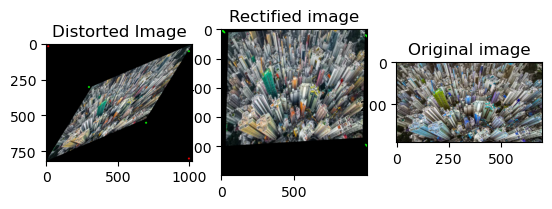

In [154]:
output_size = (1000, 1000)
affine_matrix = cv2.getAffineTransform(cp_distorted, cp_rectified)

rectified_drone = transform_image(distorted_drone, affine_matrix, output_size)

original_image = cv2.imread('drone_image.jpg')

fig, ax = plt.subplots(1, 3)

ax[0].imshow(distorted_drone)
ax[0].set_title('Distorted Image')

ax[1].imshow(rectified_drone)
ax[1].set_title('Rectified image')

ax[2].imshow(original_image)
ax[2].set_title('Original image')

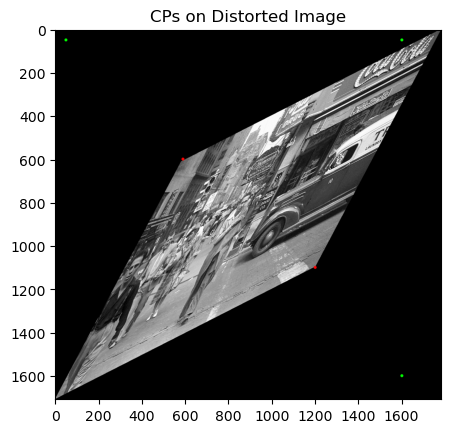

In [183]:
distorted_hist = cv2.imread('distorted_hist.png')
cp_rectified = np.array([[50, 50], [1600, 1600], [1600, 50]], dtype=np.float32) # green
cp_distorted = np.array([[590, 600], [1200, 1100], [1600, 50]], dtype=np.float32) # red

distorted_hist = cv2.cvtColor(distorted_hist, cv2.COLOR_BGR2RGB)

for point in cp_distorted:
    cv2.circle(distorted_hist, tuple(point.astype(int)), 7, (255, 0, 0), -1)

for point in cp_rectified:
    cv2.circle(distorted_hist, tuple(point.astype(int)), 7, (0, 255, 0), -1)

plt.imshow(distorted_hist)
plt.title('CPs on Distorted Image')
plt.show()

Text(0.5, 1.0, 'Original image')

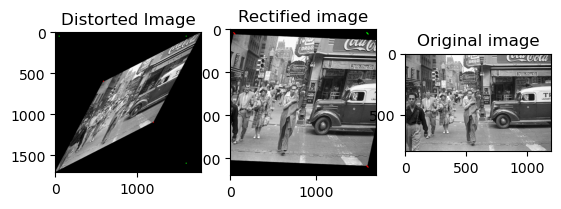

In [170]:
output_size = (1700, 1700)
affine_matrix = cv2.getAffineTransform(cp_rectified, cp_distorted)

rectified_hist = transform_image(distorted_hist, affine_matrix, output_size)

original_image = cv2.imread('historical_image.jpg')

fig, ax = plt.subplots(1, 3)

ax[0].imshow(distorted_hist)
ax[0].set_title('Distorted Image')

ax[1].imshow(rectified_hist)
ax[1].set_title('Rectified image')

ax[2].imshow(original_image)
ax[2].set_title('Original image')

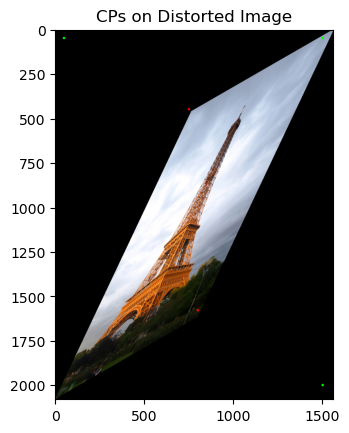

In [184]:
distorted_arch = cv2.imread('eiffel_distorted.png')
cp_rectified = np.array([[50, 50], [1500, 2000], [1500, 50]], dtype=np.float32) # green
cp_distorted = np.array([[750, 450], [800, 1580], [1500, 50]], dtype=np.float32) # red

distorted_arch = cv2.cvtColor(distorted_arch, cv2.COLOR_BGR2RGB)

for point in cp_distorted:
    cv2.circle(distorted_arch, tuple(point.astype(int)), 7, (255, 0, 0), -1)

for point in cp_rectified:
    cv2.circle(distorted_arch, tuple(point.astype(int)), 7, (0, 255, 0), -1)

plt.imshow(distorted_arch)
plt.title('CPs on Distorted Image')
plt.show()

Text(0.5, 1.0, 'Original image')

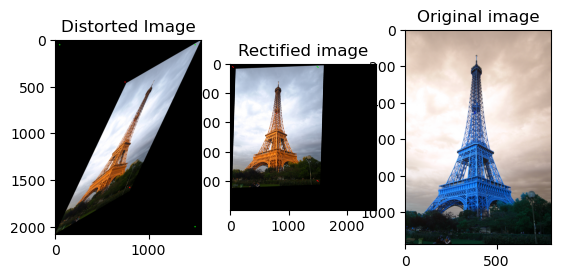

In [181]:
output_size = (2500, 2500)
affine_matrix = cv2.getAffineTransform(cp_rectified, cp_distorted)

rectified_arch = transform_image(distorted_arch, affine_matrix, output_size)

original_image = cv2.imread('eiffel.jpg')

fig, ax = plt.subplots(1, 3)

ax[0].imshow(distorted_arch)
ax[0].set_title('Distorted Image')

ax[1].imshow(rectified_arch)
ax[1].set_title('Rectified image')

ax[2].imshow(original_image)
ax[2].set_title('Original image')